In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, KBinsDiscretizer
from sklearn.compose import TransformedTargetRegressor
import pandas as pd
import tensorflow as tf
import numpy as np
import json

#  Import and read the charity_data.csv.
import pandas as pd 

In [2]:
initial_df = pd.read_json("drifting_ll_1.json")
initial_df.head()

,mmsi,timestamp,speed,course,lat,lon,is_fishing
0,12639560807591,2012-01-21 09:01:44,8.2,230.500000,14.865583,-26.853662,-1
1,12639560807591,2012-01-21 09:03:25,7.3,238.399994,14.863870,-26.856800,-1
2,12639560807591,2012-01-21 09:05:34,6.8,238.899994,14.861551,-26.860649,-1
3,12639560807591,2012-01-21 10:54:41,6.9,251.800003,14.822686,-26.865898,-1
4,12639560807591,2012-01-21 10:55:41,6.1,231.100006,14.821825,-26.867579,-1


In [3]:
initial_df['lat'] = initial_df['lat'].astype(int)
initial_df['lon'] = initial_df['lon'].astype(int)

In [7]:
#mmsi is an identifier (aka the boat name). drop it
# time stamp? 
# what does the course number mean 
# -1=standard 'loitering', other two are more active? 1 0
# round lat and lon to ints for sanity's sake
# process timestamp into year month? 
month_list = []
for i in range(len(initial_df['timestamp'])):
    month_list.append(initial_df['timestamp'][i].month_name())

initial_df["Month"] = month_list
initial_df.head()

,mmsi,timestamp,speed,course,lat,lon,is_fishing,Month
0,12639560807591,2012-01-21 09:01:44,8.2,230.500000,14,-26,-1,January
1,12639560807591,2012-01-21 09:03:25,7.3,238.399994,14,-26,-1,January
2,12639560807591,2012-01-21 09:05:34,6.8,238.899994,14,-26,-1,January
3,12639560807591,2012-01-21 10:54:41,6.9,251.800003,14,-26,-1,January
4,12639560807591,2012-01-21 10:55:41,6.1,231.100006,14,-26,-1,January


In [8]:
year_list = []
for i in range(len(initial_df['timestamp'])):
    year_list.append(initial_df['timestamp'][i].year)

initial_df["Year"] = year_list
initial_df.head()

,mmsi,timestamp,speed,course,lat,lon,is_fishing,Month,Year
0,12639560807591,2012-01-21 09:01:44,8.2,230.500000,14,-26,-1,January,2012
1,12639560807591,2012-01-21 09:03:25,7.3,238.399994,14,-26,-1,January,2012
2,12639560807591,2012-01-21 09:05:34,6.8,238.899994,14,-26,-1,January,2012
3,12639560807591,2012-01-21 10:54:41,6.9,251.800003,14,-26,-1,January,2012
4,12639560807591,2012-01-21 10:55:41,6.1,231.100006,14,-26,-1,January,2012


In [9]:
processing_df = initial_df.drop(["mmsi","timestamp"], axis=1)
processing_df.head()

,speed,course,lat,lon,is_fishing,Month,Year
0,8.2,230.500000,14,-26,-1,January,2012
1,7.3,238.399994,14,-26,-1,January,2012
2,6.8,238.899994,14,-26,-1,January,2012
3,6.9,251.800003,14,-26,-1,January,2012
4,6.1,231.100006,14,-26,-1,January,2012


In [10]:
processing_df['course'].value_counts()

360.000000    426
201.000000     23
22.000000      23
24.000000      21
200.000000     20
             ... 
79.900002       1
326.399994      1
332.799988      1
146.100006      1
272.500000      1
Name: course, Length: 3241, dtype: int64

In [11]:
to_test = pd.get_dummies(processing_df)
X = to_test.drop(['is_fishing'], axis=1)
y = to_test['is_fishing']
X.columns

Index(['speed', 'course', 'lat', 'lon', 'Year', 'Month_April', 'Month_August',
       'Month_December', 'Month_February', 'Month_January', 'Month_July',
       'Month_June', 'Month_March', 'Month_May', 'Month_November',
       'Month_October', 'Month_September'],
      dtype='object')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')
training_score = clf.score(X_train_scaled, y_train)
testing_score = clf.score(X_test_scaled, y_test)
clf.predict([[6.9, 230, 14, -8, 0,0,0,0,0,0,0,0,0,0,0,1, 2012]])

Training Score: 0.9996491228070176
Testing Score: 0.9733333333333334


array([-1], dtype=int64)

In [21]:
#organize into order: speed, course, lat, long, months, year 
prediction_speed = np.arange(processing_df['speed'].min(), processing_df['speed'].max())
prediction_course = np.arange(processing_df['course'].min(), processing_df['course'].max())
potential_lats = np.arange(processing_df['lat'].min(),processing_df['lat'].max())
potential_lons = np.arange(processing_df['lon'].min(),processing_df['lon'].max())
prediction_months = [0] * 12
prediction_years = [2015,2016,2017,2018]

In [27]:
month_names = ['Jan','Feb','Mar','Apr','May','Jun','July','August','Sep','Oct','Nov','Dec']

In [48]:
prediction_values = {}
test_list = []
for i in prediction_years:
    prediction_values[i] = {}
    
    
    for j, index in enumerate(month_names):
        key_name = month_names[j]
        prediction_months[j] = 1
        prediction_values[i][key_name] = {}

        for k, index in enumerate(potential_lons):
             lon_val = potential_lons[k]

             for l, index in enumerate(potential_lats):
                lat_val = potential_lats[l]
                full_list = [lat_val] + [lon_val] + prediction_months + [i]

                for m, index in enumerate(prediction_course):
                    course_val = prediction_course[m]

                    for n, index in enumerate(prediction_speed):
                          speed_val = prediction_speed[n]
                          full_list = [speed_val] + [course_val] + [lat_val] + [lon_val] + prediction_months + [i]
                          test_list.append(clf.predict([full_list]))
                          #prediction_values[i][key_name] = clf.predict([full_list])
            
        prediction_values[i][key_name] = test_list
        #reset
        prediction_months[j] = 0
        test_list = []


In [45]:
prediction_values

{2015: {'Jan': array([-1], dtype=int64)}}

(array([ 739.,  832., 3627., 1976.,  252.,  674.,  178.,   97.,  296.,
        2729.]),
 array([ 7. , 10.6, 14.2, 17.8, 21.4, 25. , 28.6, 32.2, 35.8, 39.4, 43. ]),
 <BarContainer object of 10 artists>)

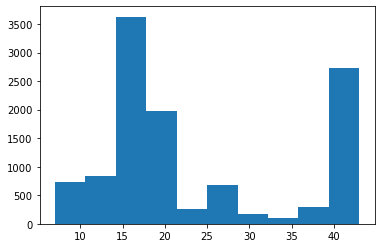

In [19]:
import matplotlib.pyplot as plt
plt.hist(initial_df['lat'])

In [ ]:
initial_df.head()

,mmsi,timestamp,speed,course,lat,lon,is_fishing,Month,Year
0,12639560807591,2012-01-21 09:01:44,8.2,230.500000,14,-26,-1,January,2012
1,12639560807591,2012-01-21 09:03:25,7.3,238.399994,14,-26,-1,January,2012
2,12639560807591,2012-01-21 09:05:34,6.8,238.899994,14,-26,-1,January,2012
3,12639560807591,2012-01-21 10:54:41,6.9,251.800003,14,-26,-1,January,2012
4,12639560807591,2012-01-21 10:55:41,6.1,231.100006,14,-26,-1,January,2012


In [ ]:
#try testing for course, and time 